##Assignment‑2: Basic Data Pre‑Processing (UCI Dataset)

###Objective: Perform core data‑preprocessing operations on a real dataset using Python.

###Dataset used: Housing data - Kaggle Dataset

The Housing dataset contains information related to residential properties and various factors that influence housing prices. It includes both numerical and categorical attributes such as area, number of bedrooms, bathrooms, stories, parking availability, and furnishing status. These features collectively describe the physical characteristics and amenities of houses.


##Step 1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
print("Libraries imported successfully")

Libraries imported successfully


##Step 2: Load Dataset

In [ ]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


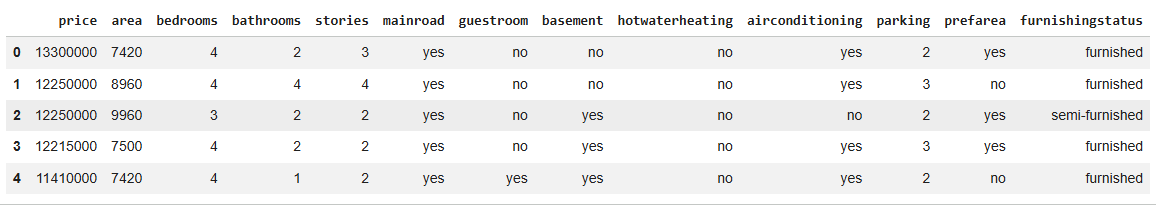

In [ ]:
print(df.shape)
df.info()

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##Step 3: Dataset Overview

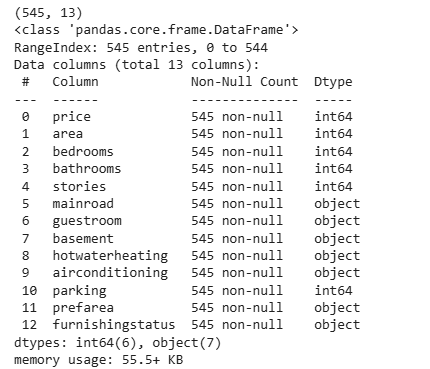

##Step 4: Data Types & Summary

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


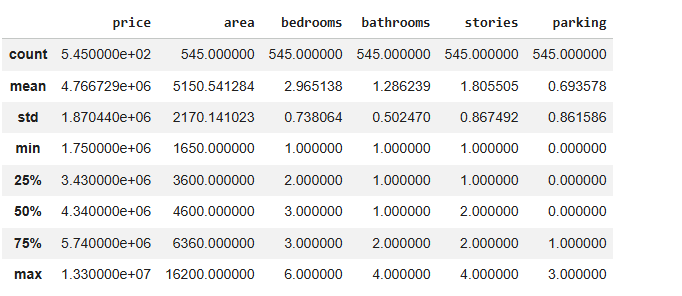

##Step 5: Check Missing Values


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


##Step 6: Handle Missing Values (if found)


In [ ]:
# Example strategy: fill numeric columns with mean
for col in df.select_dtypes(include=['float64','int64']).columns:
   df[col].fillna(df[col].mean(), inplace=True)


# Fill categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
   df[col].fillna(df[col].mode()[0], inplace=True)


df.isnull().sum()


## Step 7: Encode Categorical Column


In [ ]:
#Label encoding
le = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
511,2520000,3180,3,1,1,0,0,0,0,0,0,0,unfurnished
333,3920000,3000,3,1,2,1,0,0,0,0,0,0,semi-furnished
130,5866000,4800,3,1,1,1,1,1,0,0,0,0,unfurnished
212,4893000,3420,4,2,2,1,0,1,0,1,2,0,semi-furnished
382,3570000,3150,3,1,2,1,0,1,0,0,0,0,furnished


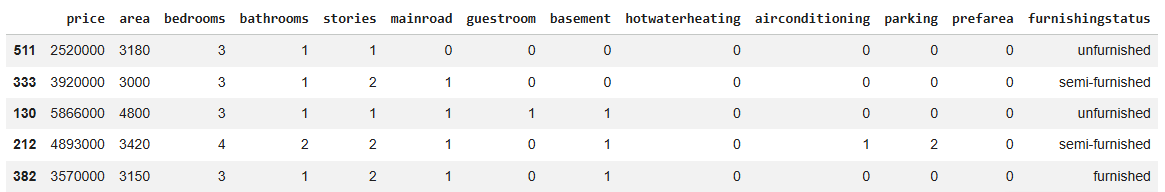

## Step 9: Feature Scaling


In [ ]:
scaler = StandardScaler()
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
304,4193000,1.429541,0.047278,-0.570187,-0.929397,1,0,1,0,0,2.679409,0,semi-furnished
390,3500000,-1.390837,0.047278,1.421812,0.224410,0,0,0,0,0,-0.805741,0,unfurnished
69,6790000,3.200637,1.403419,1.421812,0.224410,1,0,0,0,0,1.517692,1,furnished
433,3290000,-0.770492,1.403419,-0.570187,0.224410,0,0,0,0,0,0.355976,0,semi-furnished
467,3010000,-0.881185,0.047278,-0.570187,0.224410,1,0,0,0,0,1.517692,0,semi-furnished


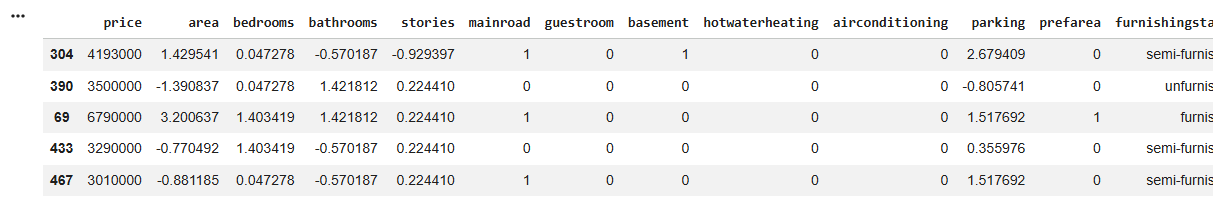

## Step 10: Save Final Dataset


In [ ]:
df.to_csv("cleaned_data.csv", index=False)
print("Cleaned data file saved")

Cleaned data file saved


##Conclusion:
In this analysis, the Housing dataset was systematically examined and preprocessed to ensure data quality and reliability for further modeling. Key steps such as handling missing values, removing duplicate records, encoding categorical variables, and applying feature scaling helped transform the raw data into a clean, consistent, and machine-learning-ready format. Exploratory checks on data types and statistical summaries also provided valuable insights into the structure and distribution of the features.

Overall, the preprocessing pipeline improved the dataset’s usability and reduced the risk of biased or inaccurate predictions. The final cleaned dataset is well-prepared for applying regression or other predictive models to analyze housing prices and related factors. This structured approach ensures that subsequent modeling results will be more robust, interpretable, and reliable.